Faire ressortir les mots associés à chaque catégorie de mots

Faire une nouvelle DB avec les mots qui nous intéressent le plus par ici

Des mots caractéristiques de la pathologie

Bien analyser chaque groupe, préciser plus, voir si on peut en faire quelque chose

Trouver des caractéristiques communes entre tous ces articles

Regarder les infos discriminantes qu

In [26]:
import os
import pandas as pd

from src.constants import *

In [27]:
with open(os.path.join(DATA_PATH, "2021AB_SN", "SG"), "r") as f:
    group_df = pd.read_csv(f, sep="|", header=None)

full_names = {}
for abbrev, name in group_df[[0,1]].itertuples(index=False):
    if abbrev not in full_names.keys():
        full_names[abbrev] = name.upper()

In [28]:
filename = "20694497"

list_rows = []

for filename in os.listdir(ARTICLES_PATH):
        
    with open(os.path.join(ARTICLES_PATH, filename, "entities.csv"), "r") as f:
        entities_df = pd.read_csv(f).drop("Unnamed: 0", axis=1)
    
    file_distrib = {"Document": filename}
    
    for i, v in entities_df["Type"].value_counts().iteritems():
        if i == "ENTITY":
            i = "UNDEF"
        elif i in full_names.keys():
            i = full_names[i]
        if i not in file_distrib.keys():
            file_distrib[i] = v
        else:
            file_distrib[i] += v

    list_rows.append(file_distrib)

In [29]:
word_distrib_df = pd.DataFrame(list_rows)

In [30]:
word_distrib_df = word_distrib_df[["DISORDERS", "ANATOMY", "PHYSIOLOGY", "CHEMICALS & DRUGS"]].fillna(0).astype(int)

In [31]:
word_distrib_df

,DISORDERS,ANATOMY,PHYSIOLOGY,CHEMICALS & DRUGS
0,165,95,46,25
1,165,5,41,9
2,175,46,16,26
3,207,1,44,8
4,68,3,7,2
...,...,...,...,...
170,123,33,19,14
171,16,0,6,2
172,76,10,13,4
173,116,37,18,51


In [32]:
word_distrib_df.keys()

Index(['DISORDERS', 'ANATOMY', 'PHYSIOLOGY', 'CHEMICALS & DRUGS'], dtype='object')

In [33]:
word_distrib_df.columns

Index(['DISORDERS', 'ANATOMY', 'PHYSIOLOGY', 'CHEMICALS & DRUGS'], dtype='object')

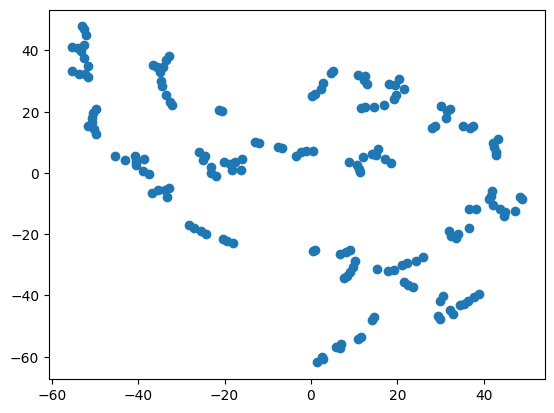

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

word_distrib_TSNE = TSNE(n_components=2, learning_rate='auto', init='random', random_state=0, perplexity=3).fit_transform(word_distrib_df.values)

plt.figure()
plt.scatter(word_distrib_TSNE[:,0], word_distrib_TSNE[:,1])
plt.show()

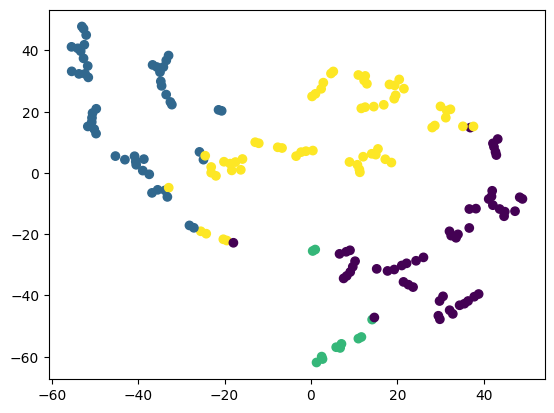

In [35]:
from sklearn.cluster import KMeans

word_distrib_kmeans = KMeans(n_clusters=4, random_state=0).fit(word_distrib_df.values)

plt.figure()
plt.scatter(word_distrib_TSNE[:,0], word_distrib_TSNE[:,1], c=word_distrib_kmeans.labels_)
plt.show()

# Regarder la répartition des mots par cluster (avec catégories, ou sans catégories)

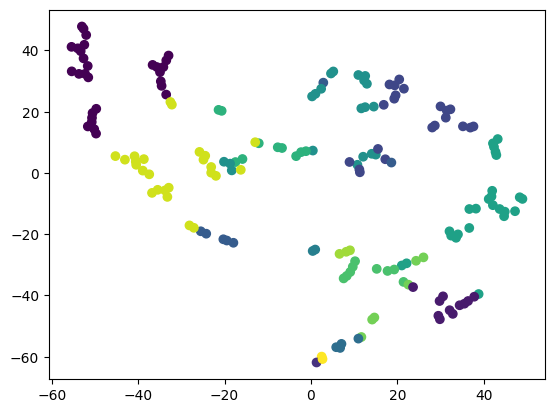

In [36]:
from sklearn.cluster import AffinityPropagation

word_distrib_kmeans = AffinityPropagation(random_state=0).fit(word_distrib_df.values)

plt.figure()
plt.scatter(word_distrib_TSNE[:,0], word_distrib_TSNE[:,1], c=word_distrib_kmeans.labels_)
plt.show()

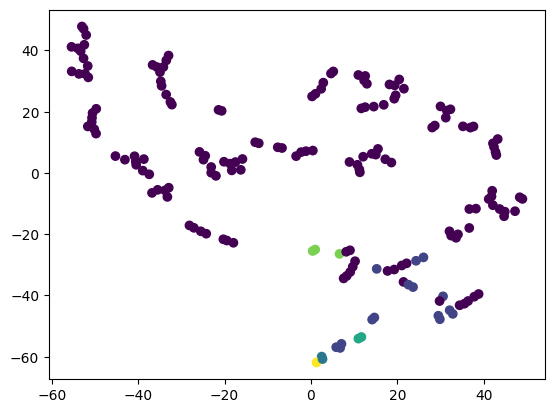

In [37]:
from sklearn.cluster import MeanShift

word_distrib_kmeans = MeanShift().fit(word_distrib_df.values)

plt.figure()
plt.scatter(word_distrib_TSNE[:,0], word_distrib_TSNE[:,1], c=word_distrib_kmeans.labels_)
plt.show()

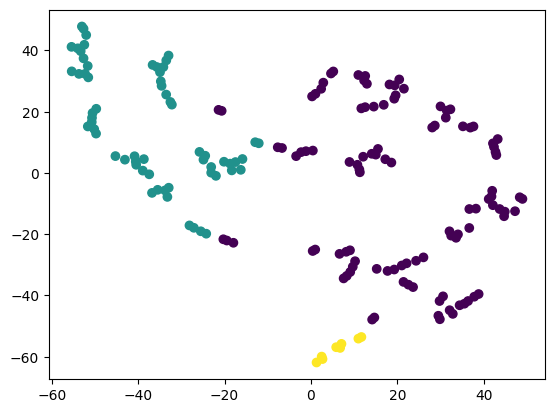

In [38]:
from sklearn.cluster import AgglomerativeClustering

word_distrib_kmeans = AgglomerativeClustering(n_clusters=3).fit(word_distrib_df.values)

plt.figure()
plt.scatter(word_distrib_TSNE[:,0], word_distrib_TSNE[:,1], c=word_distrib_kmeans.labels_)
plt.show()

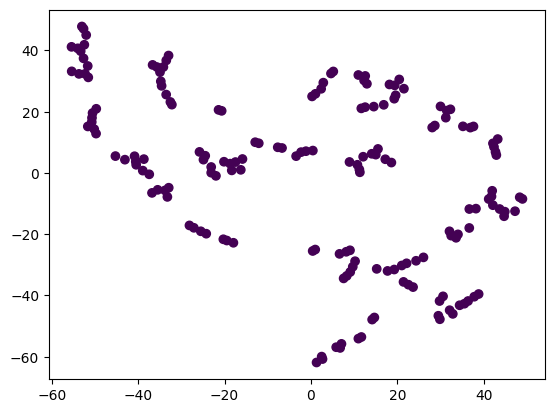

In [39]:
from sklearn.cluster import DBSCAN

word_distrib_kmeans = DBSCAN().fit(word_distrib_df.values)

plt.figure()
plt.scatter(word_distrib_TSNE[:,0], word_distrib_TSNE[:,1], c=word_distrib_kmeans.labels_)
plt.show()